# Demostrates Applying a Color Combination Choice to a Complex

This notebook will demonstrate applying one of the color lists made by the [Demo of Sampling Various Combinations of Applying A Color Palette to a Complex](notebooks/demo_palette.ipynb). Please review that first, if you have not.

The code is set up to be general. You can run it with the defaults now and it should work. With a little change to the specified places, you can make it address your favorite structure and colors.

Return to [the first page](index.ipynb) for a list of the demonstrations available.

----



## Preparation

While this uses the settings and results of [the previous demo](notebooks/demo_palette.ipynb); however, you don't need to have just run that notebook for thus to work because it is self-contained. (For demonstrating, leave things as defined throughout. After verifying all works, you can then edit things to use your structure and color choices.) 

Running the next cell will specify the necessary settings from the previous notebook.

In [1]:
PDB_id_code = '6q9b'
my_colors_as_strings = ["slate","violet","violetpurple","lightblue","my_color","Gray30","white"]
orientation_string = "-0.984500647, 0.043761615, 0.169820756, 0.167749062, 0.517372191, 0.839159250, -0.051139157, 0.854639351, -0.516694129, 0.000000000, 0.000000000, -623.999755859, 376.089996338, 316.122253418, 360.227386475, 491.966186523, 756.033325195, -20.000000000"

With the basic settings defined, we are no ready to try applying a choice of colors to the chains.

## Applying a choice of colors

Let's imagine that we wished to adapt the following result, #18, from the previous notebook.

![example image 18](../doc/img_18w_label.png)

The corresponding coloring list found in `color_lists.txt` follows:

```code
seed 18: [('chain 4L', 'slate'), ('chain A1', 'my_color'), ('chain A3', 'Gray30'), ('chain A8', 'white'), ('chain AB', 'violetpurple'), ('chain AJ', 'lightblue'), ('chain AK', 'violet'), ('chain AM', 'slate'), ('chain B1', 'my_color'), ('chain B2', 'Gray30'), ('chain B3', 'white'), ('chain B4', 'violetpurple'), ('chain B5', 'lightblue'), ('chain B6', 'violet'), ('chain B7', 'slate'), ('chain B8', 'my_color'), ('chain B9', 'Gray30'), ('chain BJ', 'white'), ('chain BK', 'violetpurple'), ('chain C1', 'lightblue'), ('chain C2', 'violet'), ('chain D1', 'slate'), ('chain D2', 'my_color'), ('chain D3', 'Gray30'), ('chain D4', 'white'), ('chain D5', 'violetpurple'), ('chain D6', 'lightblue'), ('chain S2', 'violet'), ('chain S5', 'slate')]
```

We are going to make text that we can then insert back in code like we did in the previous notebook. We are going to do this in what might seem an awkward way because we want to make something we could edit before we actually process it.

The following code will edit that list down to what is necessary.

In [2]:
raw_chosen_list='''
seed 18: [('chain 4L', 'slate'), ('chain A1', 'my_color'), ('chain A3', 'Gray30'), ('chain A8', 'white'), ('chain AB', 'violetpurple'), ('chain AJ', 'lightblue'), ('chain AK', 'violet'), ('chain AM', 'slate'), ('chain B1', 'my_color'), ('chain B2', 'Gray30'), ('chain B3', 'white'), ('chain B4', 'violetpurple'), ('chain B5', 'lightblue'), ('chain B6', 'violet'), ('chain B7', 'slate'), ('chain B8', 'my_color'), ('chain B9', 'Gray30'), ('chain BJ', 'white'), ('chain BK', 'violetpurple'), ('chain C1', 'lightblue'), ('chain C2', 'violet'), ('chain D1', 'slate'), ('chain D2', 'my_color'), ('chain D3', 'Gray30'), ('chain D4', 'white'), ('chain D5', 'violetpurple'), ('chain D6', 'lightblue'), ('chain S2', 'violet'), ('chain S5', 'slate')]
'''
chosen_colors_list = raw_chosen_list.split("[")[1].split("]")[0]
print('chosen_colors_tuples_text ="{}"'.format(chosen_colors_list) ) 

chosen_colors_tuples_text ="('chain 4L', 'slate'), ('chain A1', 'my_color'), ('chain A3', 'Gray30'), ('chain A8', 'white'), ('chain AB', 'violetpurple'), ('chain AJ', 'lightblue'), ('chain AK', 'violet'), ('chain AM', 'slate'), ('chain B1', 'my_color'), ('chain B2', 'Gray30'), ('chain B3', 'white'), ('chain B4', 'violetpurple'), ('chain B5', 'lightblue'), ('chain B6', 'violet'), ('chain B7', 'slate'), ('chain B8', 'my_color'), ('chain B9', 'Gray30'), ('chain BJ', 'white'), ('chain BK', 'violetpurple'), ('chain C1', 'lightblue'), ('chain C2', 'violet'), ('chain D1', 'slate'), ('chain D2', 'my_color'), ('chain D3', 'Gray30'), ('chain D4', 'white'), ('chain D5', 'violetpurple'), ('chain D6', 'lightblue'), ('chain S2', 'violet'), ('chain S5', 'slate')"


That gives the following:

```python
chosen_colors_tuples_text ="('chain 4L', 'slate'), ('chain A1', 'my_color'), ('chain A3', 'Gray30'), ('chain A8', 'white'), ('chain AB', 'violetpurple'), ('chain AJ', 'lightblue'), ('chain AK', 'violet'), ('chain AM', 'slate'), ('chain B1', 'my_color'), ('chain B2', 'Gray30'), ('chain B3', 'white'), ('chain B4', 'violetpurple'), ('chain B5', 'lightblue'), ('chain B6', 'violet'), ('chain B7', 'slate'), ('chain B8', 'my_color'), ('chain B9', 'Gray30'), ('chain BJ', 'white'), ('chain BK', 'violetpurple'), ('chain C1', 'lightblue'), ('chain C2', 'violet'), ('chain D1', 'slate'), ('chain D2', 'my_color'), ('chain D3', 'Gray30'), ('chain D4', 'white'), ('chain D5', 'violetpurple'), ('chain D6', 'lightblue'), ('chain S2', 'violet'), ('chain S5', 'slate')"
```

We'll take and run it in the next cell and then use that to replace `the_COLOR_LIST_PLACEHOLDER` in the code to submit to PyMol.  
Note that if we wanted to customize it further, we could edit the contents of that cell further before running it. For example, we could edit `slate` in the first color combo to instead read `cyan`, for example, and then chain 4L would be colored cyan. To get something we could easily edit and use later was why we took a rather odd path to this point. We wanted to generate something easy to change prior to the next steps, and so that is why we didn't just use output from the previous cell via python.

In [3]:
chosen_colors_tuples_text ="('chain 4L', 'slate'), ('chain A1', 'my_color'), ('chain A3', 'Gray30'), ('chain A8', 'white'), ('chain AB', 'violetpurple'), ('chain AJ', 'lightblue'), ('chain AK', 'violet'), ('chain AM', 'slate'), ('chain B1', 'my_color'), ('chain B2', 'Gray30'), ('chain B3', 'white'), ('chain B4', 'violetpurple'), ('chain B5', 'lightblue'), ('chain B6', 'violet'), ('chain B7', 'slate'), ('chain B8', 'my_color'), ('chain B9', 'Gray30'), ('chain BJ', 'white'), ('chain BK', 'violetpurple'), ('chain C1', 'lightblue'), ('chain C2', 'violet'), ('chain D1', 'slate'), ('chain D2', 'my_color'), ('chain D3', 'Gray30'), ('chain D4', 'white'), ('chain D5', 'violetpurple'), ('chain D6', 'lightblue'), ('chain S2', 'violet'), ('chain S5', 'slate')"

Now we are ready to send that to some python code to generate an image. As with the previous notebook, any color that isn't built-in to PyMol has to be included like the line `cmd.set_color ("my_color", [*hex_to_rgb("#7D80B0")])`.

However, I am going to add one highlight of a chain to illustrate how you can customize this further for one chain in the mix. We didn't just designate the color above because we are going to change the representation as well.

Writing 'text_2_save' (str) to file 'script.py'.
 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 86.73 sec. = 41.5 frames/hour (86.73 sec. accum.).
 ScenePNG: wrote 500x500 pixel image to file "choice_example.png".


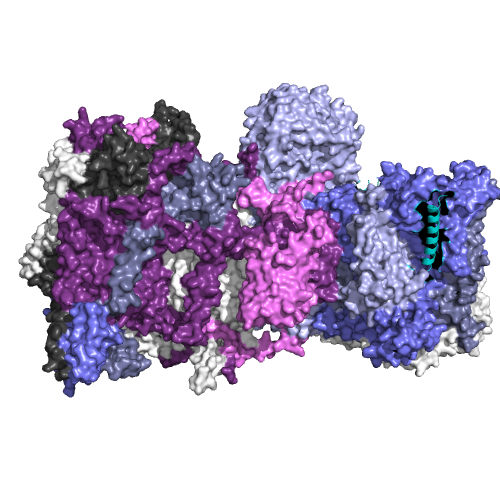

In [4]:
text_2_save_templ = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

import pymol
cmd = pymol.cmd
# end of set-up


# get the structure & load it into PyMol
cmd.fetch('the_STRUCTURE_PLACEHOLDER')
cmd.zoom()

# set my preferred starting point for representation
cmd.set ("ray_opaque_background", 0)
cmd.set ("cartoon_fancy_helices", 1)
cmd.bg_color ("white")
cmd.set ("cartoon_side_chain_helper", "on")
cmd.hide ("everything", "all")

#set desired orientation
def set_my_view():
    cmd.set_view("the_ORIENTATION_PLACEHOLDER")
set_my_view()

# define any custom colors
def hex_to_rgb(value):
    #based on https://stackoverflow.com/a/214657/8508004
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
cmd.set_color ("my_color", [*hex_to_rgb("#7D80B0")])

# specify the colors and chains/metals to apply it to
color_list = [the_COLOR_LIST_PLACEHOLDER]

# get list of metals for setting display options
stored.elems = []
cmd.iterate ("metals", "stored.elems.append(elem)")
the_metals = list(set(stored.elems))
the_metals_as_selections = ["resn {}".format(x) for x in the_metals]

#base display styling
cmd.show ("surface", "polymer.protein and not chain D3")
#show metals as speheres
for sm in the_metals_as_selections:
    cmd.show ("spheres", sm)
cmd.set ("fog_start", 0.70) #move fog back farther so not hitting main part as much

#use the list to color
for o,c in color_list:
    cmd.color(c,o)
    
#To customize further, add display options below
cmd.color('cyan','chain D3')
cmd.show('cartoon','chain D3')

cmd.png("choice_example.png", width=500, height=500, dpi=72, ray=1, quiet=0)

'''
text_2_save = text_2_save_templ.replace("the_STRUCTURE_PLACEHOLDER",PDB_id_code)
text_2_save = text_2_save.replace("the_COLOR_LIST_PLACEHOLDER",chosen_colors_tuples_text)
text_2_save = text_2_save.replace("the_ORIENTATION_PLACEHOLDER",orientation_string)
%store text_2_save > script.py
!pymol -cq script.py
from IPython.display import Image
Image("choice_example.png")

 This was the original:

![example image 18](../doc/img_18w_label.png)

Spot on to the original with the exception of the extra change introduced for illustration.

Now edit above to render your own structures. Don't forget to save your changes and output.

Increase the `width` and `height` settings in the `cmd.png()` line near the bottom to render larger images.

----
Return to [the first page](index.ipynb) for a list of the demonstrations available.

----